In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,roc_auc_score

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_train = pd.read_csv(r"C:\Users\HP\Downloads\titanic-logistic-regression-main\Titanic_train.csv")

In [3]:
data_test = pd.read_csv(r"C:\Users\HP\Downloads\titanic-logistic-regression-main\Titanic_test.csv")

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
data_test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [8]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_14620\3965777433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data_train, palette="bright")


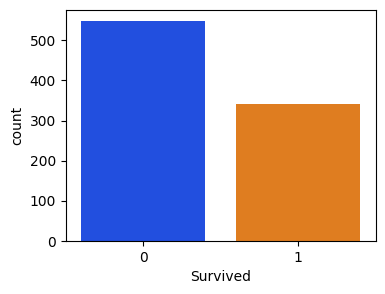

In [10]:
# Assuming 'df_train' is your DataFrame containing the data
plt.figure(figsize=(4,3))

# Create the count plot for the 'Survived' column
sns.countplot(x="Survived", data=data_train, palette="bright")

# Show the plot
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

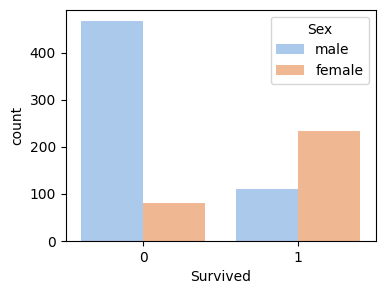

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(x="Survived", hue="Sex", data=data_train, palette='pastel')

C:\Users\HP\AppData\Local\Temp\ipykernel_14620\2286124331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=data_train, palette="colorblind")


<Axes: xlabel='Pclass', ylabel='Survived'>

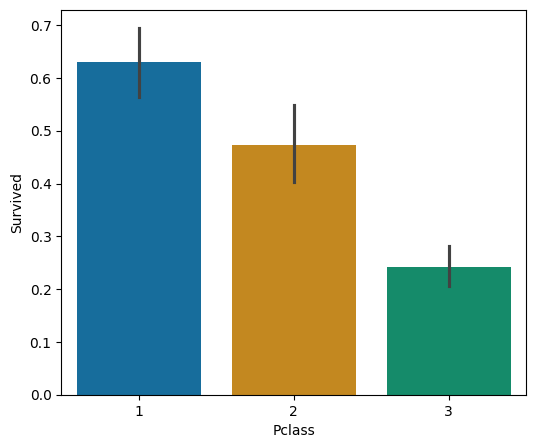

In [12]:
plt.figure(figsize=(6,5))
sns.barplot(x="Pclass", y="Survived", data=data_train, palette="colorblind")

<Axes: xlabel='Pclass', ylabel='Age'>

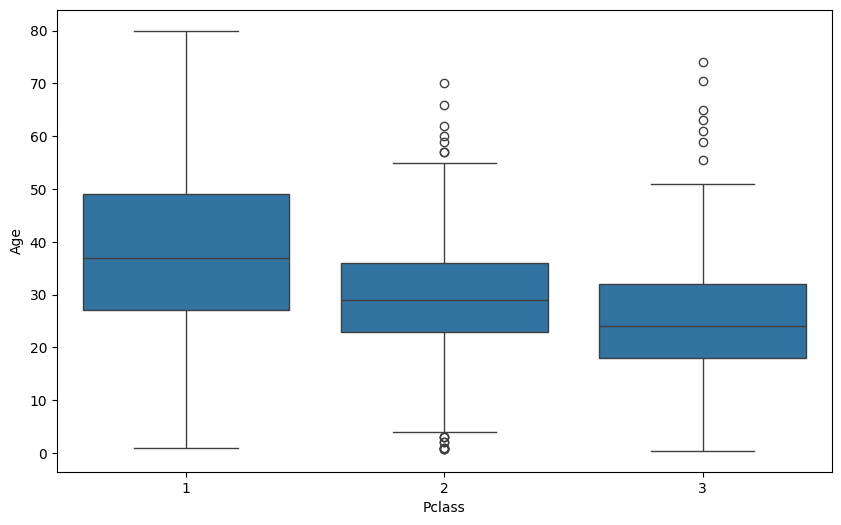

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=data_train)

In [14]:
data_train[data_train['Pclass']==1]['Age'].mean().round(2)

38.23

In [15]:
data_train[data_train['Pclass']==2]['Age'].mean().round(2)

29.88

In [16]:
data_train[data_train['Pclass']==3]['Age'].mean().round(2)

25.14

In [17]:
def avg_age(i):
    Age=i[0]
    Pclass=i[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
        
    else:
        return Age

In [18]:
data_train['Age'] = data_train[['Age','Pclass']].apply(avg_age,axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14620\2454213007.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=i[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_14620\2454213007.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=i[1]


In [19]:
data_test['Age'] = data_test[['Age','Pclass']].apply(avg_age,axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_14620\2454213007.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=i[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_14620\2454213007.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=i[1]


<Axes: >

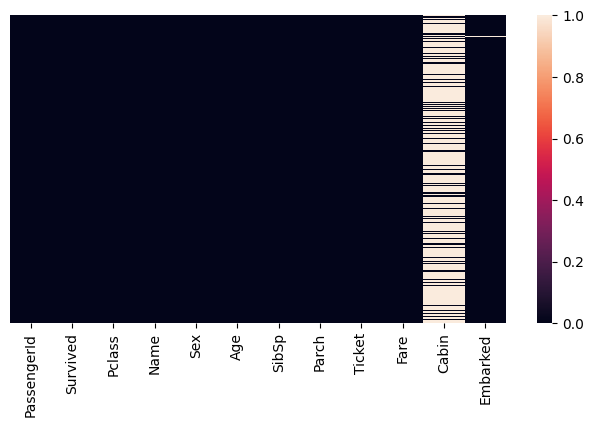

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(data_train.isnull(), yticklabels=False)

<Axes: >

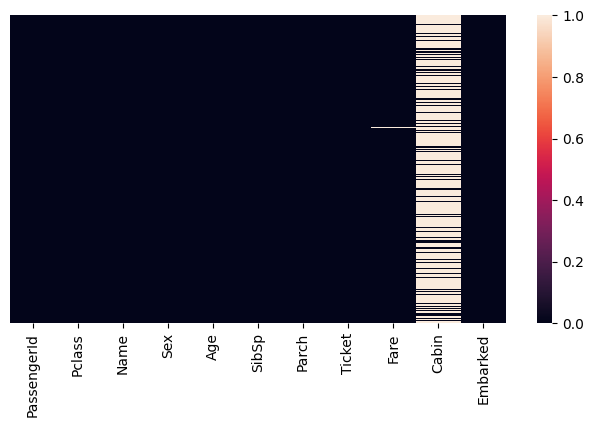

In [21]:
# For test_df data
plt.figure(figsize=(8,4))
sns.heatmap(data_test.isnull(),yticklabels=False)

Text(0.5, 1.0, 'Female')

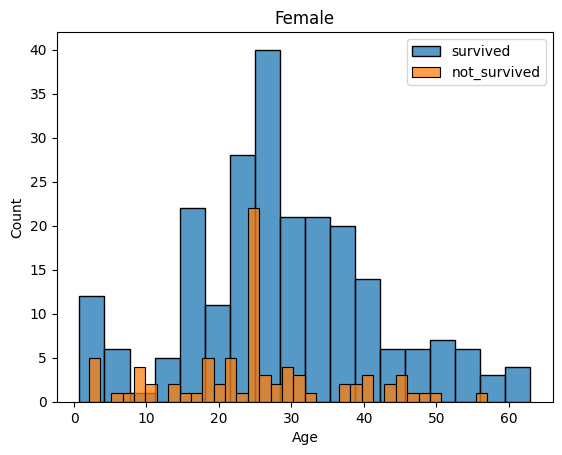

In [22]:
##FOR Female
women = data_train[data_train['Sex']=='female']
fem = sns.histplot(women[women['Survived']==1].Age,bins=18,label='survived')
fem = sns.histplot(women[women['Survived']==0].Age,bins=35,label='not_survived')
fem.legend()
fem.set_title('Female')

Text(0.5, 1.0, 'Male')

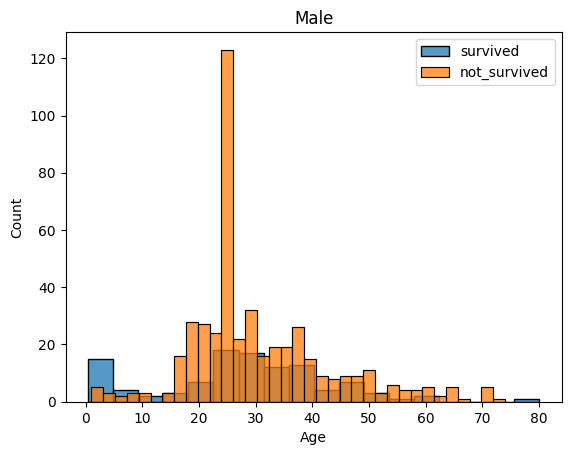

In [23]:
###For male
men = data_train[data_train['Sex']=='male']
males = sns.histplot(men[men['Survived']==1].Age,bins=18,label='survived')
males = sns.histplot(men[men['Survived']==0].Age,bins=35,label='not_survived')
males.legend()
males.set_title('Male')

In [24]:
## Dropping the Cabin column as it contains more missing values
data_train.drop("Cabin", axis=1,inplace=True)
data_test.drop("Cabin", axis=1, inplace=True)

In [25]:
data_test.dropna(inplace=True)

In [26]:
data_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [27]:
data_train["Embarked"]=data_train["Embarked"].fillna("S")

In [28]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
sex=pd.get_dummies(data_train["Sex"],drop_first=True)
Embarked=pd.get_dummies(data_train["Embarked"],drop_first=True)
data_train.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
data_train=pd.concat([data_train,sex,Embarked],axis=1)

In [30]:
data_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [31]:
col=["male","Q","S"]
le = LabelEncoder()
for i in col:
    data_train[i]=le.fit_transform(data_train[i])
data_train.head()    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Splitting the data into training and testing**

In [32]:
x=data_train.drop("Survived",axis=1)
y=data_train["Survived"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)


In [33]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [34]:
##Logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

#fitting the data and predicted for testing data
y_pred_test = lr.predict(x_test)
y_pred_test

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [35]:
## Checking the accuracy between the actual and prediction of testing data
print(classification_report(y_test,y_pred_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test,y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       153
           1       0.81      0.70      0.75       115

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy: 0.8022388059701493
Precision: 0.81
Recall: 0.7043478260869566


In [36]:
## Assuming x and y are already defined as your features and targets
train_acc, test_acc=[], []
lr = LogisticRegression()

#Looping throug random state from 1 to 100
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    lr.fit(x_train,y_train)
    train_acc.append(metrics.accuracy_score(y_train, lr.predict(x_train)))
    test_acc.append(metrics.accuracy_score(y_test, lr.predict(x_test)))
    
print(f"Train Accuracy: {np.mean(train_acc).round(2)}")
print(f"Test Accuracy: {np.mean(test_acc).round(2)}")
    

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Train Accuracy: 0.79
Test Accuracy: 0.79


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [37]:
# Plotting roc_curve and prediction roc_auc_score

data_train["y_proba"]=lr.predict_proba(x)[:,1]
fpr,tpr,dummy=roc_curve(y,data_train["y_proba"])

AUC score: 0.822


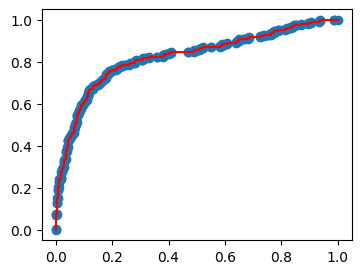

In [38]:
plt.figure(figsize=(4,3))
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color="red")
print("AUC score:", roc_auc_score(y,data_train["y_proba"]).round(3))

In [39]:
import joblib
joblib.dump(lr, 'logistic_model.pkl')

['logistic_model.pkl']

## Interview Question 

**1. What is the difference between precision and recall?**

    - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It answers the question: How many of the items we predicted as positive are actually positive? Precision is important when the cost of false positives is high
        
    - Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to all observations in the actual class. It answers the question: How many actual positives were correctly predicted? Recall is important when the cost of false negatives is high.
        
 

**2. What is cross-validation, and why is it important in binary classification?**

    - Cross-validation is a technique used to assess the performance of a machine learning model by dividing the dataset into multiple subsets or "folds." The model is trained on a portion of the data and tested on the remaining fold. This process is repeated multiple times, with each fold being used as a test set once. The most common type is k-fold cross-validation, where the data is split into k subsets.

    - Important 1.Reduces Overfitting ,Better Performance Estimation, Helps in Hyperparameter Tuning and Works with Imbalanced Datasets

